# Problema 1. 

In [1]:
# importar los modulos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import chi2
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import statsmodels.api as sm


# Exploracion de los Datos

In [2]:
# cargar los datos y ver que hay.
df = pd.read_csv('BitStudentDataSet - Hoja 1.csv')
print('Filas: ', df.shape[0], 'Columnas: ', df.shape[1])
df.head()

Filas:  20 Columnas:  10


,NOMBRES,APELLIDOS,DIRECCION,DOCUMENTO,CORREO,NOTA 1,NOTA 2,NOTA 3,NOTA 4,NOTA FINAL
0,PEPE,PERES,Carrera 4 # 67-45,12445436,pep@pruba.com,5,5,4,NaN,NaN
1,MARIA,PEREZ,Carrera 5 # 68-48,12345552,lol@pruba.com,4,1,3,NaN,NaN
2,LORA,MALDONADO,Carrera 6 # 69-51,12245668,fgdd@pruba.com,5,4,2,NaN,NaN
3,JAIME,TORO,Carrera 4 # 67-46,12145784,dfees@pruba.com,3,2,3,NaN,NaN
4,CARLOS,CARRILLO,Carrera 5 # 68-49,12045900,adfggg@pruba.com,5,4,2,NaN,NaN


In [3]:
# Revisar si hay NaN
df.isna().sum()

NOMBRES        0
APELLIDOS      0
DIRECCION      0
DOCUMENTO      0
CORREO         0
NOTA 1         0
NOTA 2         0
NOTA 3         0
NOTA 4        20
NOTA FINAL    20
dtype: int64

Es un dataset que tiene nombres, apellidos, direcion, documento, correo, y diferentes notas. Sin embargo, no hay ningun valor para la nota 4 ni Nota final. Es dificil recuperar esos datos, entonces voy a eliminar ambas columnas

In [4]:
df.drop(columns = ['NOTA 4', 'NOTA FINAL'], inplace = True)
df.head()

,NOMBRES,APELLIDOS,DIRECCION,DOCUMENTO,CORREO,NOTA 1,NOTA 2,NOTA 3
0,PEPE,PERES,Carrera 4 # 67-45,12445436,pep@pruba.com,5,5,4
1,MARIA,PEREZ,Carrera 5 # 68-48,12345552,lol@pruba.com,4,1,3
2,LORA,MALDONADO,Carrera 6 # 69-51,12245668,fgdd@pruba.com,5,4,2
3,JAIME,TORO,Carrera 4 # 67-46,12145784,dfees@pruba.com,3,2,3
4,CARLOS,CARRILLO,Carrera 5 # 68-49,12045900,adfggg@pruba.com,5,4,2


In [5]:
# Revisar el tipo de cada variable!
df.dtypes
# Todas son cadenas de caracteres. Las notas son numericas, claramente. Sin embargo, Python tambien entiende que Documento 
#es numerica

NOMBRES      object
APELLIDOS    object
DIRECCION    object
DOCUMENTO     int64
CORREO       object
NOTA 1        int64
NOTA 2        int64
NOTA 3        int64
dtype: object

De la base de datos se puede recuperar el Genero de las personas. 

In [6]:
#Crear una variable de genero
df['GENERO'] = 0
df['GENERO'][df['NOMBRES'].str.strip().str[-1] == 'A'] = 1
df['GENERO'][df['NOMBRES'].str.strip().str[-1] == 'Y'] = 1
df.head()

#IMPORTANTE TENER EN CUENTA QUE 1 es mujer, 0 es hombre.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,NOMBRES,APELLIDOS,DIRECCION,DOCUMENTO,CORREO,NOTA 1,NOTA 2,NOTA 3,GENERO
0,PEPE,PERES,Carrera 4 # 67-45,12445436,pep@pruba.com,5,5,4,0
1,MARIA,PEREZ,Carrera 5 # 68-48,12345552,lol@pruba.com,4,1,3,1
2,LORA,MALDONADO,Carrera 6 # 69-51,12245668,fgdd@pruba.com,5,4,2,1
3,JAIME,TORO,Carrera 4 # 67-46,12145784,dfees@pruba.com,3,2,3,0
4,CARLOS,CARRILLO,Carrera 5 # 68-49,12045900,adfggg@pruba.com,5,4,2,0


Hay cierta informacion que no se usara en los modelos. Entre estas estan los nombres, apellidos, direccion y Documento

In [7]:
df_datos = df.iloc[:, 5:].copy()

# IMPORTANTE: SON MUY POCOS DATOS, ASI QUE SE VAN A SIMULAR DATOS DE GENERO Y DE NOTAS EN EL DATASET

In [8]:
#Se van a simular datos con distribucion normal, ya que normalmente las notas tienden a tener esa distribucion. Se simulan solo
# 1000 para que los algoritmos no demoren tanto entrenanod pero para tener los datos suficientes.
# Se utiliza una desviacion estandar de 0.63 ya que en una distribucion normal es raro que los datos se alejen mas de 3 o 4 
# desviaciones estandar de la media (2.5). Con esto se logra que todas las notas esten entre 0 y 5. Se pasa a entero
np.random.seed(1)
notas1 = np.random.normal(df_datos['NOTA 1'].mean(), 0.64, 1000).astype(int)
np.random.seed(2)
notas2 = np.random.normal(df_datos['NOTA 2'].mean(), 0.64, 1000).astype(int)
np.random.seed(3)
notas3 = np.random.normal(df_datos['NOTA 3'].mean(), 0.64, 1000).astype(int)

In [9]:
# Tengo que crear datos tambien de genero. Lo hago con distribucion uniforme.
np.random.seed(4)
genero = np.random.randint(0,2, 1000)

In [10]:
#Creo un dataFrame para unirlo
df_simulado = pd.DataFrame( {'NOTA 1': notas1, 'NOTA 2': notas2, 'NOTA 3': notas3, 'GENERO': genero} )

In [11]:
df_global = df_datos.append(df_simulado)

# ESTADISTICAS DESCRIPTIVAS

In [12]:
df_global.describe()

,NOTA 1,NOTA 2,NOTA 3,GENERO
count,1020.000000,1020.000000,1020.000000,1020.000000
mean,3.481373,2.566667,2.582353,0.509804
std,0.718906,0.734985,0.722607,0.500149
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,2.000000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,1.000000
75%,4.000000,3.000000,3.000000,1.000000
max,6.000000,5.000000,5.000000,1.000000


Se asume que la maxima nota es 5. Quiere decir que hay outliers. 

In [13]:
# REMUEVO SOLAMENTE LOS QUE SEAN MAYOR A 5 en NOTA 1
df_global = df_global[df_global['NOTA 1'] <= 5]
df_global.shape

(1016, 4)

In [14]:
df_global.describe()

,NOTA 1,NOTA 2,NOTA 3,GENERO
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,3.471457,2.566929,2.582677,0.510827
std,0.702685,0.733068,0.723331,0.500129
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,2.000000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,1.000000
75%,4.000000,3.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,1.000000


In [15]:
df_global.dtypes

NOTA 1    int64
NOTA 2    int64
NOTA 3    int64
GENERO    int64
dtype: object

# REGRESION LINEAL

In [16]:
# Encuentro correlaciones
df_global.corr()

,NOTA 1,NOTA 2,NOTA 3,GENERO
NOTA 1,1.000000,-0.016370,-0.062226,-0.001923
NOTA 2,-0.016370,1.000000,-0.003014,0.047736
NOTA 3,-0.062226,-0.003014,1.000000,-0.012009
GENERO,-0.001923,0.047736,-0.012009,1.000000


Era de esperarse que tengan correlaciones bajas porque fueron variables simuladas de forma iid (independientes e identicamente distribuidas). Para mostrar "conocimientos de regresion lineal":
- Se va a tomar la nota 3 como variable Y
- El genero sera la variable que controle
- hipotesis. El desempeño mejora en el tiempo, porque los estudiantes se esfuerzan cada vez mas 

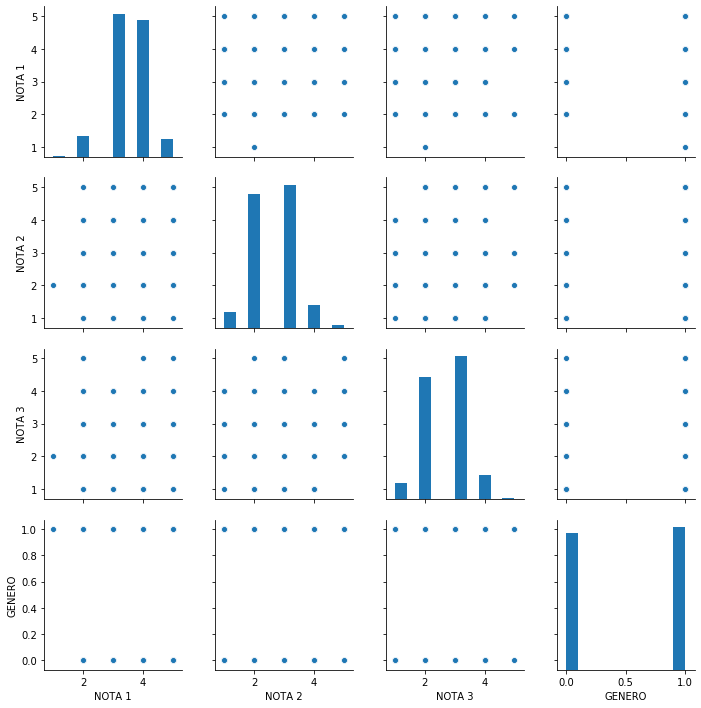

In [17]:
# Graficas
sns.pairplot(df_global)

In [18]:
#Separo las variables
X = df_global[['NOTA 1', 'NOTA 2', 'GENERO']]
y = df_global['NOTA 3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 999)



In [19]:
#creo y entreno el modelo
modelo = LinearRegression( )
modelo.fit(X_train,y_train)
print ('Modelo Lineal')
print('Nota 3 = ' + str(round(modelo.intercept_, 4)) +' + Nota1*' + str(round(modelo.coef_[0], 4)) + ' + Nota2*' + str(round(modelo.coef_[1], 4)) + ' + Genero*' + str(round(modelo.coef_[2], 4)) )

Modelo Lineal
Nota 3 = 2.7084 + Nota1*-0.0375 + Nota2*-0.0043 + Genero*0.0233


In [20]:
#Se hacen las predicciones y se calculan los errores
y_pred = modelo.predict(X_test)
mse_lineal = metrics.mean_squared_error(y_test, y_pred)
mae_lineal = metrics.mean_absolute_error(y_test, y_pred)
r_cuadrado = metrics.r2_score(y_test, y_pred)
print('El Error cuadratico medio es:', round(mse_lineal, 4))
print('El Error absoluto medio es:', round(mae_lineal, 4))
print('R cuadrado', round(r_cuadrado, 5) )
print('Promedio de las notas 3', df_global['NOTA 3'].mean())
print('Desviacion de las notas 3', df_global['NOTA 3'].std())

El Error cuadratico medio es: 0.5511
El Error absoluto medio es: 0.6509
R cuadrado 0.00541
Promedio de las notas 3 2.5826771653543306
Desviacion de las notas 3 0.7233305004743635


Basado en los coeficientes, dado que estan muy cercanos a 0, se quiere ver si son significativos

In [21]:
X_train_ = X_train.copy()
X_train_['intercepto'] = 1
linear_mod =sm.regression.linear_model.OLS(y_train,X_train_)
result=linear_mod.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 NOTA 3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4406
Date:                Sun, 05 Jul 2020   Prob (F-statistic):              0.724
Time:                        20:00:28   Log-Likelihood:                -881.88
No. Observations:                 812   AIC:                             1772.
Df Residuals:                     808   BIC:                             1791.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NOTA 1        -0.0375      0.036     -1.038      0.3

Se podria llegar a pensar erroneamente el impacto que tiene nota 1, 2 y genero sobre nota 3. Sin embargo, se que en los p valores que ningun parametro estimado es significativo (solo la constante). La prueba de siginifancia F tampoco rechaza la hipotesis nula -> quiere decir que los coeficientes son 0
El modelo no nos ayuda a explicar la nota 3. Este hallazgo no es raro porque se simularon datos iid 

# REGRESION LOGISTICA

In [22]:
# Aqui lo que se va querer hacer es predecir el genero.
X, y = df_global.iloc[:,0:3], df_global.iloc[:, 3]

In [23]:
#Separar los datos.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999)

In [ ]:
# modelo
log_model = LogisticRegression(random_state = 999, solver = 'saga', max_iter = 1000, verbose = 2, n_jobs = -1)
parametros = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C': np.arange(0,2,0.1)}
cv = KFold(n_splits = 5)
modelo = GridSearchCV(log_model, parametros, cv = cv, refit = True)
modelo.fit(X_train, y_train)
modelo.best_params_

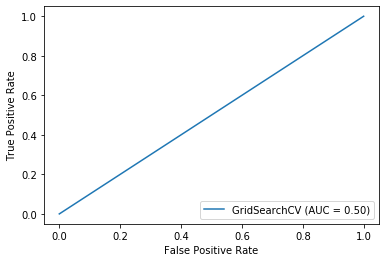

In [25]:
#Probabilidades
pred_prob = modelo.predict_proba(X_test)[:, 1]

# Graficar
re_ = plot_roc_curve(modelo, X_test, y_test)
re_

Como era de esperarse, por la similacion de los datos. La curva ROC muestra que el modelo tiene un muy mal desempeño para los datos de testeo
No es de la forma como se seleccionaron los parametros, si no de los datos en sí

# K NN
- Para esta situacion, es necesario normalizar los datos. Debido a que el algoritmo es sensible a la magnitud de los datos cuando calcula las distancias

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 999)

In [27]:
escalados = X_train.values
scaler_train = MinMaxScaler()
scaler_train.fit(escalados)
X_escalados_train = pd.DataFrame(scaler_train.transform(escalados), columns = X.columns)
print(X_escalados_train.head())
X_escalados_train.describe()

   NOTA 1  NOTA 2  NOTA 3
0    0.75    0.25    0.50
1    0.75    0.50    0.25
2    0.50    0.25    0.50
3    0.25    0.50    0.50
4    0.50    0.75    0.50


,NOTA 1,NOTA 2,NOTA 3
count,762.000000,762.000000,762.000000
mean,0.619423,0.394029,0.393373
std,0.173877,0.184858,0.179058
min,0.000000,0.000000,0.000000
25%,0.500000,0.250000,0.250000
50%,0.500000,0.500000,0.500000
75%,0.750000,0.500000,0.500000
max,1.000000,1.000000,1.000000


In [28]:
escalados = X_test.values
scaler_test = MinMaxScaler()
scaler_test.fit(escalados)
X_escalados_test = pd.DataFrame(scaler_test.transform(escalados), columns = X.columns)
print(X_escalados_test.head())
X_escalados_test.describe()

     NOTA 1  NOTA 2  NOTA 3
0  0.666667    0.00    0.25
1  0.333333    0.50    0.50
2  0.000000    0.50    0.25
3  0.666667    0.25    0.50
4  0.666667    0.50    0.25


,NOTA 1,NOTA 2,NOTA 3
count,254.000000,254.000000,254.000000
mean,0.484252,0.384843,0.402559
std,0.241621,0.178588,0.186245
min,0.000000,0.000000,0.000000
25%,0.333333,0.250000,0.250000
50%,0.333333,0.500000,0.500000
75%,0.666667,0.500000,0.500000
max,1.000000,1.000000,1.000000


In [29]:
# YA SE TIENEN LOS DATOS ESCALADOS. AHORA entrenar el modelo
# Crear un loop (for) para validar el resultado en accuracy para distintos k. Guardar los resultados en entrenamiento y prueba
train_scores = []
test_scores = []

vecinos=np.arange(1, 500, 2)

menor_score = np.inf
vec = np.nan

for k in vecinos:
    #Hacer el modelo
    modelo = KNeighborsClassifier(n_neighbors= k)
    #Hacer el fit
    modelo.fit(X_escalados_train, y_train)
    #Predecir los de train y los de test
    y_pred_train = modelo.predict(X_escalados_train)
    y_pred_test = modelo.predict(X_escalados_test)
    #Hacer los scores y meterlos a las listas
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    train_scores.append( 1 - accuracy_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    test_scores.append(1- accuracy_test)
    
    if (1- accuracy_test) < menor_score:
        menor_score = 1- accuracy_test
        vec = k
print('Menor error de test', round(menor_score,5))
print('Numero de vecinos mas cercanos optimo', vec)

Menor error de test 0.44488
Numero de vecinos mas cercanos optimo 483


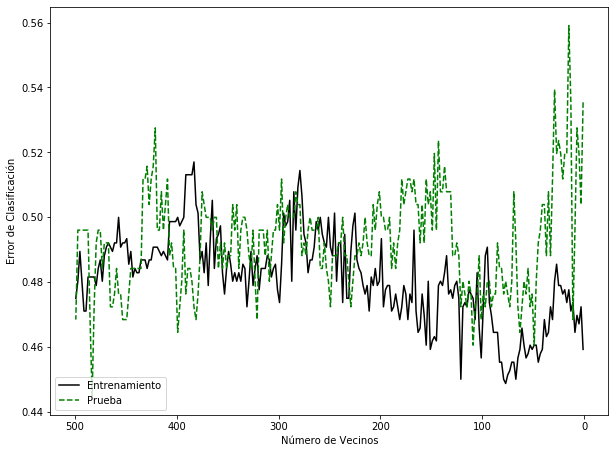

In [30]:
plt.figure(figsize=(10,7.5))
plt.plot(vecinos, train_scores, c="black", label="Entrenamiento")
plt.plot(vecinos, test_scores, c="green", linestyle="--", label="Prueba")
plt.xlabel('Número de Vecinos')
plt.ylabel('Error de Clasificación')
plt.gca().invert_xaxis()
plt.legend(loc = "lower left")
plt.show()

Normalmente la grafica de training disminuye a medida que el modelo se va complejizando (menos K) y la de test tiene forma de U. Sin embargo, por la naturaleza de los datos, las graficas tienen ese resultado. Igual se puede buscar el numero optimo de vecinos y el menor error de testeo. El mejor modelo es uno no tan complejo con 483 vecinos.